In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import os
print(os.listdir("data"))

['socrata_metadata_2016-building-energy-benchmarking.json', '.DS_Store', 'socrata_metadata_2015-building-energy-benchmarking.json', 'clean-building-energy-benchmarking.csv', '2015-building-energy-benchmarking.csv', '2016-building-energy-benchmarking.csv']


In [2]:
raw = pd.read_csv("data/clean-building-energy-benchmarking.csv")
data = raw.copy()

In [3]:
data.head()

,DataYear,ENERGYSTARScore,GHGEmissionsIntensity,NumberofBuildings,NumberofFloors,OSEBuildingID,PropertyGFABuilding(s),PropertyGFAParking,PropertyGFATotal,SiteEnergyUse(kBtu),...,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,ENERGYSTARCertified
0,2015,65.0,2.64,1.0,12.0,1,88434,0,88434,6981428.0,...,0,0,0,0,0,0,0,0,0,0
1,2015,51.0,2.38,1.0,11.0,2,88502,15064,103566,8354235.0,...,0,0,0,0,0,0,0,0,0,0
2,2015,18.0,1.92,1.0,41.0,3,961990,0,961990,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2015,NaN,NaN,1.0,10.0,5,61320,0,61320,28229320.0,...,0,0,0,0,0,0,0,0,0,0
4,2015,67.0,4.02,1.0,18.0,8,107430,12460,119890,14829099.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = data.dropna()

In [6]:
# TotalGHGEmissions
# SiteEnergyUseWN(kBtu)

In [7]:
X = df.drop(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions'], axis=1)
y = df[['SiteEnergyUseWN(kBtu)']]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
y_predicted = reg.predict(X_test)
print("Mean squared error: %.2f"% np.sqrt(mean_squared_error(y_test, y_predicted)))
print('R2 : %.2f' % r2_score(y_test, y_predicted))

Mean squared error: 484283.73
R2 : 0.99


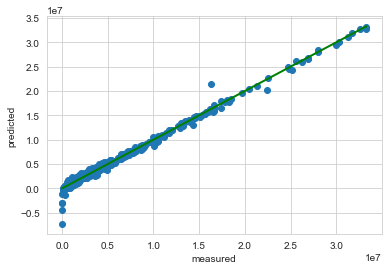

In [11]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2, c="g")
ax.set_xlabel("measured")
ax.set_ylabel("predicted")
plt.show()